Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read in the data. This will be combined into 1 dataframe called df

In [2]:
df1 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/9aa5b4c5-252c-4d68-b1be-ffe19a2f1d26/download/vehicle-fuel-type-count-by-zip-code.csv')
df2 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code.csv')
df3 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/888bbb6c-09b4-469c-82e6-1b2a47439736/download/vehicle-fuel-type-count-by-zip-code.csv')
df4 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/4254a06d-9937-4083-9441-65597dd267e8/download/vehicle-fuel-type-count-by-zip-code.csv')
df5 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/d304108a-06c1-462f-a144-981dd0109900/download/vehicle-fuel-type-count-by-zip-code.csv')


C:\Users\schowdho\AppData\Local\Temp\ipykernel_21772\4201160345.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/9aa5b4c5-252c-4d68-b1be-ffe19a2f1d26/download/vehicle-fuel-type-count-by-zip-code.csv')
C:\Users\schowdho\AppData\Local\Temp\ipykernel_21772\4201160345.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/1856386b-a196-4e7c-be81-44174e29ad50/download/vehicle-fuel-type-count-by-zip-code.csv')
C:\Users\schowdho\AppData\Local\Temp\ipykernel_21772\4201160345.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('https://data.ca.gov/dataset/vehicle-fuel-type-count-by-zip-code/resource/888bbb6c-09b4-469c-82e6-1b2a4743

Combine the data

In [3]:
frames = [df1, df2, df3, df4, df5]
df = pd.concat(frames)


Explore some basic information of the data

In [4]:
df.head(100)


,Date,Zip Code,Model Year,Fuel,Make,Duty,Vehicles
0,12/31/2022,90000,2010,Gasoline,OTHER/UNK,Light,1
1,12/31/2022,90000,2012,Hybrid Gasoline,OTHER/UNK,Light,1
2,12/31/2022,90000,2013,Gasoline,OTHER/UNK,Light,1
3,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Heavy,19
4,12/31/2022,90000,<2009,Gasoline,OTHER/UNK,Light,16
...,...,...,...,...,...,...,...
95,12/31/2022,90001,2010,Gasoline,TOYOTA,Light,199
96,12/31/2022,90001,2010,Gasoline,MAZDA,Light,13
97,12/31/2022,90001,2010,Gasoline,BMW,Light,13
98,12/31/2022,90001,2010,Gasoline,HYUNDAI,Light,15


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3356115 entries, 0 to 586232
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Date        object
 1   Zip Code    object
 2   Model Year  object
 3   Fuel        object
 4   Make        object
 5   Duty        object
 6   Vehicles    int64 
dtypes: int64(1), object(6)
memory usage: 204.8+ MB


In [6]:
df.describe()

,Vehicles
count,3.356115e+06
mean,4.592466e+01
std,1.496824e+02
min,1.000000e+00
25%,1.100000e+01
50%,1.900000e+01
75%,4.200000e+01
max,3.740700e+04


In [7]:
df.shape

(3356115, 7)

Check for null values. luckily there are none

In [8]:
df.isnull().sum()


Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Duty          0
Vehicles      0
dtype: int64

Convert the Date column to datetime format for easier reading

In [9]:
df['Date'] = pd.to_datetime(df['Date'])


Get the unique fuel types

In [10]:
df['Fuel'].unique()


array(['Gasoline', 'Hybrid Gasoline', 'Unk', 'Diesel and Diesel Hybrid',
       'Flex-Fuel', 'Natural Gas', 'Battery Electric', 'Plug-in Hybrid',
       'Other', 'Hydrogen Fuel Cell'], dtype=object)

Get the unique make types

In [11]:
df['Make'].unique()

array(['OTHER/UNK', 'FORD', 'PLYMOUTH', 'CHEVROLET', 'Unk', 'GMC',
       'WHITE', 'INFINITI', 'MERCEDES-BENZ', 'VOLKSWAGEN', 'DODGE',
       'JEEP', 'ACURA', 'HONDA', 'CHRYSLER', 'CADILLAC', 'NISSAN',
       'TOYOTA', 'MAZDA', 'BMW', 'HYUNDAI', 'LEXUS', 'KIA', 'SCION',
       'PONTIAC', 'FREIGHTLINER', 'RAM', 'AUDI', 'MINI', 'HINO',
       'MITSUBISHI', 'INTERNATIONAL', 'SUBARU', 'BUICK', 'TESLA',
       'MERCURY', 'LINCOLN', 'VOLVO', 'HUMMER', 'OLDSMOBILE', 'SATURN',
       'ISUZU', 'SUZUKI', 'LAND ROVER', 'PORSCHE', 'UNKNOWN', 'JAGUAR',
       'FIAT', 'GENESIS', 'SAAB', 'ALFA ROMEO', 'GEO', 'WORKHORSE',
       'AMERICAN LAFRANCE', 'NORTH AMERICAN BUS INDUSTRIES', 'PETERBILT',
       'MOTOR COACH INDUSTRIES', 'EL DORADO', 'NEW FLYER', 'KENWORTH',
       'GILLIG', 'BLUE BIRD', 'AUTOCAR', 'PIERCE', 'IC BUS', 'PROTERRA',
       'FWD', 'NEOPLAN', 'OSHKOSH', 'ORION', 'SEAGRAVE', 'STERLING',
       'FLXIBLE TRANSIT COACHES', 'MACK', 'TMC', 'WHITE/GMC', 'KALMAR',
       'PREVOST', 'MASERATI

Plotting the number of vehicles based on fuel type

In [12]:
fuel_counts = df.groupby('Fuel')['Vehicles'].sum().reset_index()

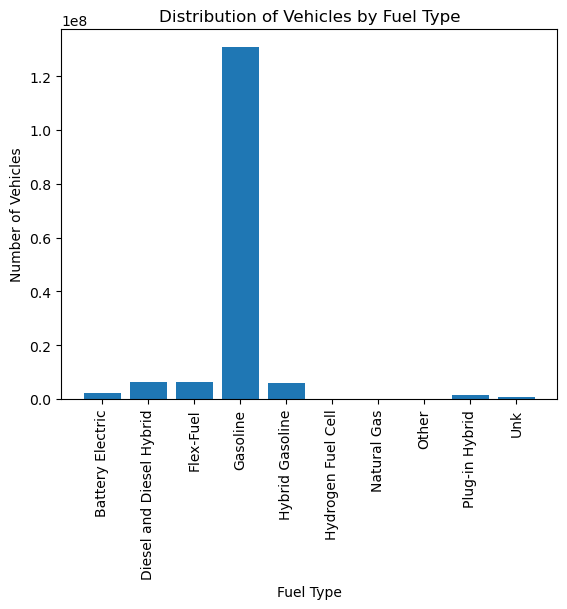

In [13]:
plt.bar(fuel_counts['Fuel'], fuel_counts['Vehicles'])
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicles by Fuel Type')
plt.show()

determine how many vehicles are of a certain make

In [14]:
# group the dataset by the 'Make' column and count the number of rows in each group
vehicles_by_make = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_make)
    
    # calculate the total number of vehicles
df['Vehicles'].count()
  


Fuel
Gasoline                    1994560
Diesel and Diesel Hybrid     415753
Flex-Fuel                    381194
Hybrid Gasoline              267365
Plug-in Hybrid               110603
Battery Electric             108686
Natural Gas                   30095
Unk                           17683
Other                         17636
Hydrogen Fuel Cell            12540
Name: Vehicles, dtype: int64


3356115

Lets represent the number of vehicles of a certain make as a ratio or percentage of the total number of vehicles in the dataset

In [15]:
# Get the count of each make
make_count = df['Make'].value_counts()

# Calculate the percentage of each make
make_percent = make_count / make_count.sum() * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(make_percent)


OTHER/UNK                         38.813181
FORD                               6.268945
TOYOTA                             6.143860
CHEVROLET                          4.854482
HONDA                              3.782081
NISSAN                             2.605542
LEXUS                              2.594160
DODGE                              2.393333
MERCEDES-BENZ                      2.200938
BMW                                2.159789
VOLKSWAGEN                         2.087205
HYUNDAI                            2.082795
JEEP                               1.989562
GMC                                1.895614
KIA                                1.894214
SUBARU                             1.868649
MAZDA                              1.868559
ACURA                              1.487821
AUDI                               1.330139
RAM                                1.073712
INFINITI                           1.068855
SCION                              0.859506
CHRYSLER                        

Lets represent the number of vehicles of a certain Fuel type as a ratio or percentage of the total number of vehicles in the dataset.

In [16]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(vehicles_by_fuel)

Fuel
Gasoline                    1994560
Diesel and Diesel Hybrid     415753
Flex-Fuel                    381194
Hybrid Gasoline              267365
Plug-in Hybrid               110603
Battery Electric             108686
Natural Gas                   30095
Unk                           17683
Other                         17636
Hydrogen Fuel Cell            12540
Name: Vehicles, dtype: int64


In [17]:
# calculate the total number of vehicles
total_vehicles = df['Vehicles'].count()
# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(total_vehicles)

3356115


In [18]:
# count the number of vehicles for each fuel type
vehicles_by_fuel = df.groupby('Fuel').count()['Vehicles'].sort_values(ascending=False)

# calculate the total number of vehicles
total_vehicles = df['Vehicles'].count()

# calculate the percentage of vehicles for each fuel type
percentages = (vehicles_by_fuel / total_vehicles) * 100

# print the results
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(percentages)

Fuel
Gasoline                    59.430621
Diesel and Diesel Hybrid    12.387925
Flex-Fuel                   11.358192
Hybrid Gasoline              7.966503
Plug-in Hybrid               3.295566
Battery Electric             3.238447
Natural Gas                  0.896721
Unk                          0.526889
Other                        0.525489
Hydrogen Fuel Cell           0.373646
Name: Vehicles, dtype: float64


<Figure size 1000x800 with 0 Axes>

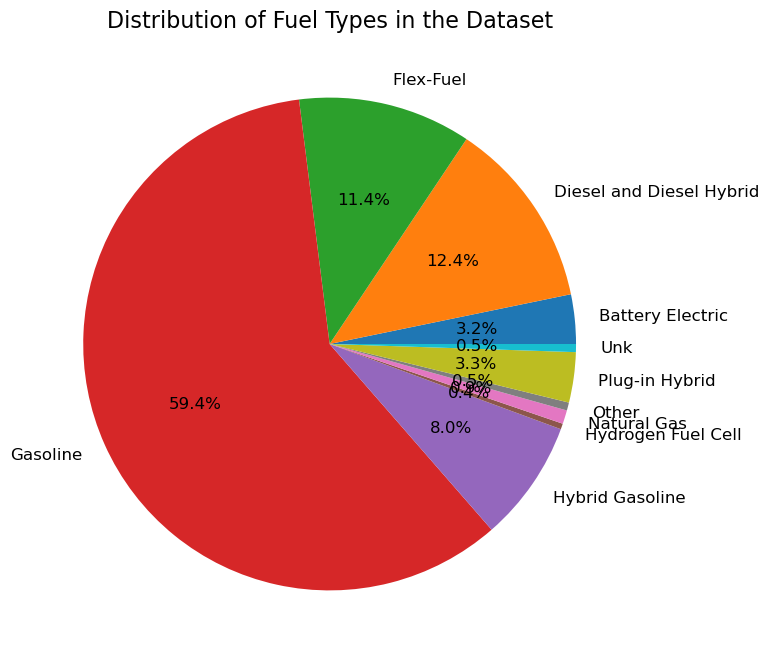

In [19]:
plt.figure(figsize=(10, 8)) # set the size of the figure
# group the data by fuel type and count the number of vehicles
fuel_counts = df.groupby('Fuel')['Vehicles'].count().reset_index()

# plot the distribution of fuel types using a pie chart


plt.figure(figsize=(10, 8))
plt.pie(fuel_counts['Vehicles'], labels=fuel_counts['Fuel'], autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title('Distribution of Fuel Types in the Dataset', fontsize=16)
plt.show()

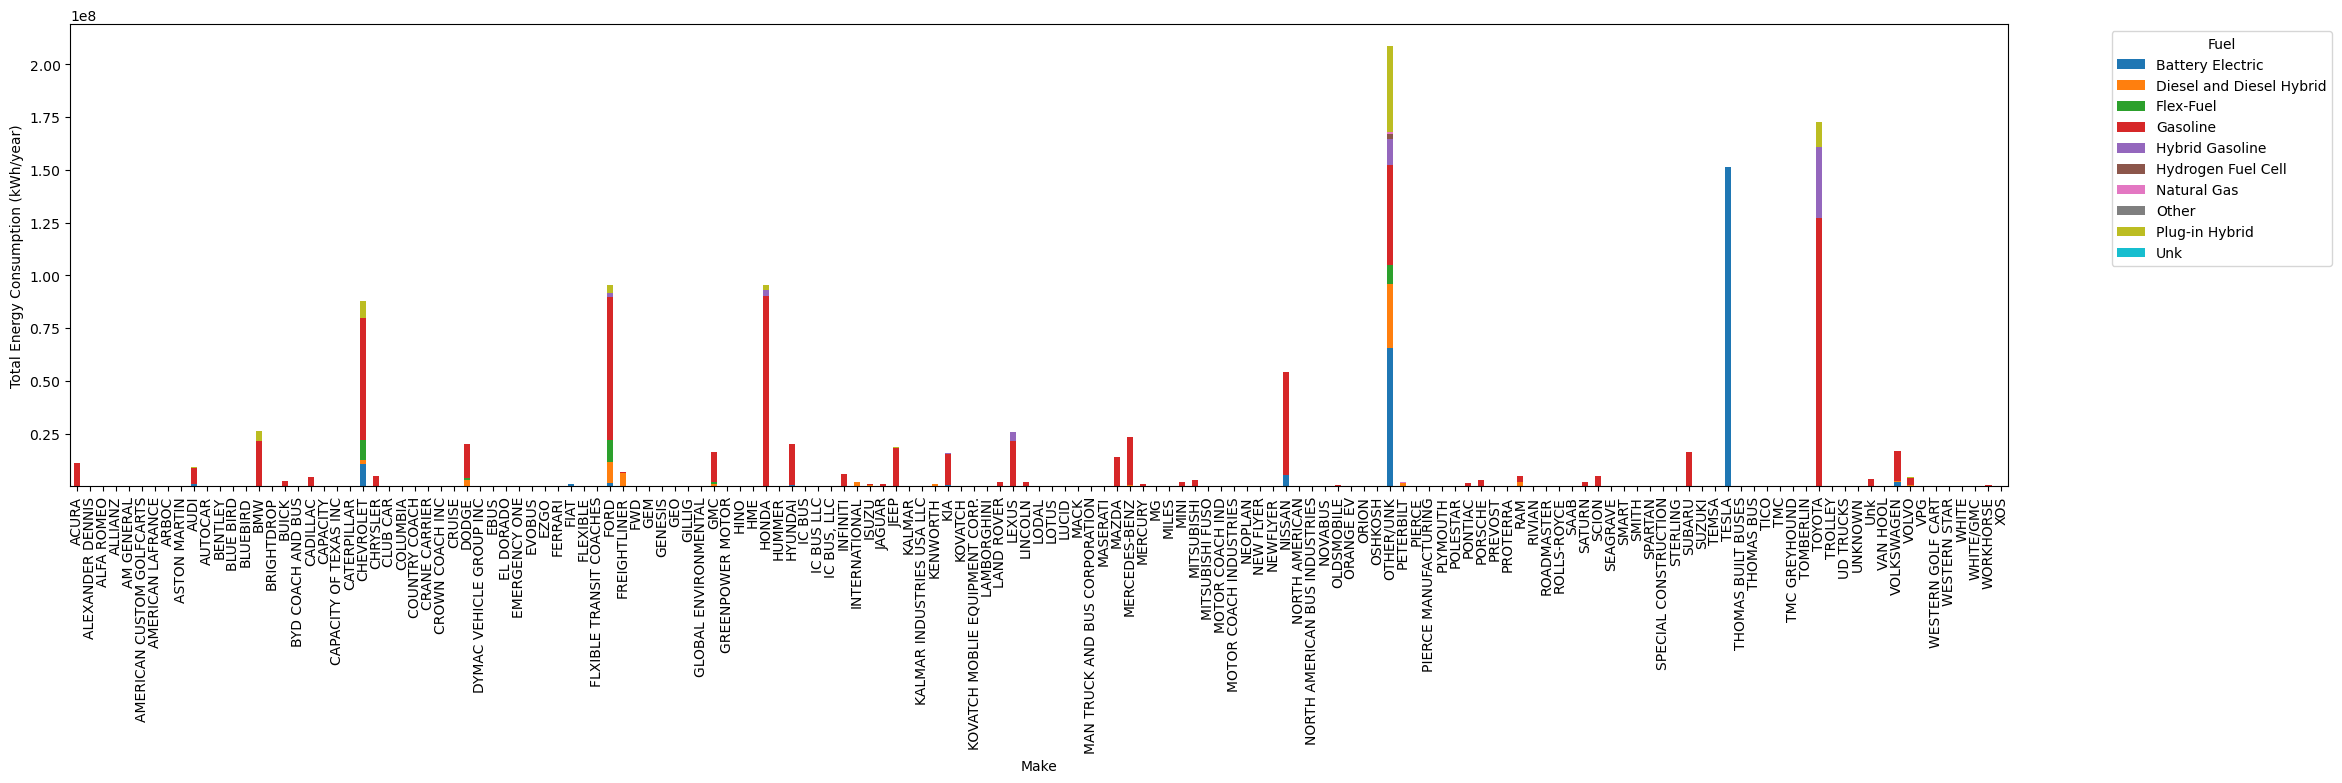

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Define energy consumption values (kWh/mile) for each fuel type
energy_consumption = {'Gasoline': 0.015, 'Other': 0, 'Diesel and Diesel Hybrid': 0.018, 'Natural Gas': 0.02, 
                      'Hybrid Gasoline': 0.025, 'Flex-Fuel': 0.015, 'Battery Electric': 0.3, 
                      'Plug-in Hybrid': 0.15, 'Hydrogen Fuel Cell': 0.2}

# Convert Duty variable to numerical (Light = 1, Heavy = 2)
df['Duty'] = df['Duty'].map({'Light': 1, 'Heavy': 2})

# Add a new column to the DataFrame to represent energy consumption per mile
df['Energy Consumption (kWh/mile)'] = df['Fuel'].map(energy_consumption)

# Calculate energy consumption per vehicle per year (kWh/year)
df['Energy Consumption (kWh/year)'] = df['Vehicles'] * df['Duty'] * df['Energy Consumption (kWh/mile)'] * 365

# Group the data by Make and Fuel, and sum the total energy consumption per year
grouped = df.groupby(['Make', 'Fuel'])['Energy Consumption (kWh/year)'].sum().unstack()

# Plot the total energy consumption by Make and Fuel using a stacked bar chart
ax = grouped.plot(kind='bar', stacked=True, figsize=(25, 6))
ax.set_ylabel('Total Energy Consumption (kWh/year)')
ax.legend(title='Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


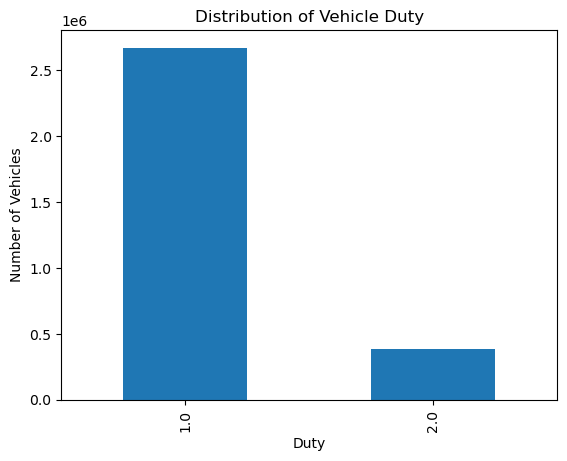

In [21]:
import matplotlib.pyplot as plt

# Count the number of light and heavy vehicles
duty_counts = df['Duty'].value_counts()

# Plot the results as a bar chart
duty_counts.plot(kind='bar')
plt.xlabel('Duty')
plt.ylabel('Number of Vehicles')
plt.title('Distribution of Vehicle Duty')
plt.show()